# Data analysis

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
imdb_data=pd.read_csv('/content/drive/MyDrive/Data_NLP/IMDB Dataset.csv')
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
imdb_data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

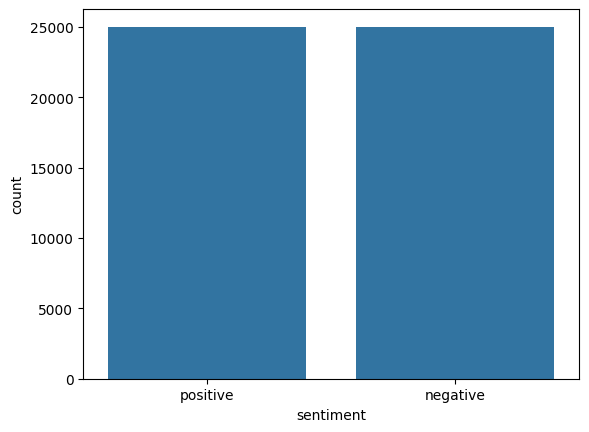

In [ ]:
sns.countplot(x=imdb_data['sentiment'])

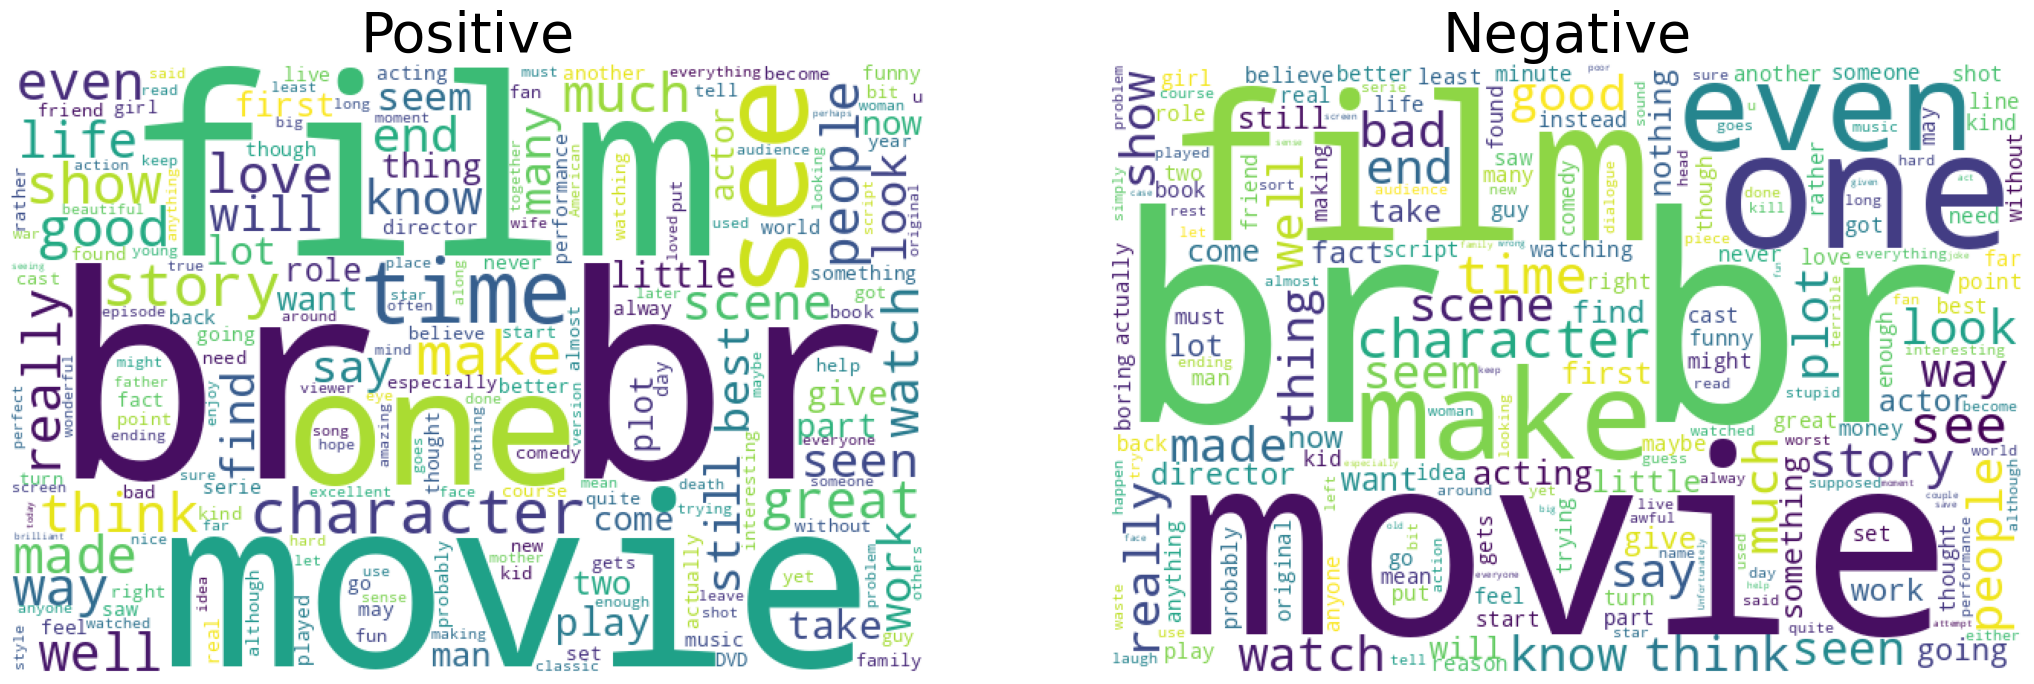

In [ ]:
def makeWordCloud(bkColor, w, h, series, title, ax):
    wcl = WordCloud(background_color=bkColor,
                    width=w,
                    height=h).generate(" ".join(series))
    ax.imshow(wcl)
    ax.axis('off')
    ax.set_title(title, fontsize=40)
positive = imdb_data[imdb_data['sentiment']=="positive"]['review']
negative = imdb_data[imdb_data['sentiment']=="negative"]['review']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])
makeWordCloud("white", 600, 400, positive, "Positive", ax1)
makeWordCloud("white", 600, 400, negative, "Negative", ax2)
plt.show()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:

tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')

In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
imdb_data['review']=imdb_data['review'].apply(denoise_text)

In [ ]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

### Text stemming

In [ ]:
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
imdb_data['review']=imdb_data['review'].apply(simple_stemmer)

### Remove stopwords

In [ ]:
stop=set(stopwords.words('english'))
print(stop)
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

{'should', 'these', 'few', 'against', 'ourselves', 'below', 'he', "aren't", 've', 'with', 'mightn', 'is', 'shan', 'whom', 'me', 'off', 'at', 'themselves', 'after', "couldn't", 'yours', 'and', 'all', 'any', 'its', 'll', "won't", 'y', "should've", "she's", 'but', 'being', 'an', 'up', "wasn't", 'him', 'them', 'be', "hadn't", 'she', 'there', 'more', 't', "didn't", 'too', 'about', 's', 'from', 'only', 'herself', 'as', 'ma', 'was', 'needn', 'or', 'most', 'doesn', 'their', 'then', "shan't", 'not', 'her', 'we', 'haven', 'very', 'had', 'for', 'a', 'does', 'some', 'hadn', 'during', 'd', 're', 'wouldn', 'the', 'no', 'aren', "isn't", 'doing', 'how', 'mustn', 'yourselves', 'did', 'on', 'again', 'until', 'above', 'been', 'my', 'couldn', 'nor', 'who', 'can', "that'll", 'i', 'ours', 'ain', 'under', 'which', "needn't", 'those', 'when', 'theirs', 'o', "mightn't", 'myself', 'were', 'by', 'will', 'his', 'they', "mustn't", 'our', 'both', 'are', "weren't", 'to', 'itself', 'each', 'didn', 'that', 'through', 

### Normalization and Splitting dataset

In [ ]:
norm_train_reviews=imdb_data.review[:40000]
norm_train_reviews[0]

'one review ha mention watch 1 oz episod youll hook right thi exactli happen meth first thing struck oz wa brutal unflinch scene violenc set right word go trust thi show faint heart timid thi show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti wa surreal couldnt say wa readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison exp

In [ ]:
norm_test_reviews=imdb_data.review[40000:]
norm_test_reviews[45005]

'read review watch thi piec cinemat garbag took least 2 page find somebodi els didnt think thi appallingli unfunni montag wasnt acm humour 70 inde ani era thi isnt least funni set sketch comedi ive ever seen itll till come along half skit alreadi done infinit better act monti python woodi allen wa say nice piec anim last 90 second highlight thi film would still get close sum mindless drivelridden thi wast 75 minut semin comedi onli world semin realli doe mean semen scatolog humour onli world scat actual fece precursor joke onli mean thi handbook comedi tit bum odd beaver niceif pubesc boy least one hand free havent found playboy exist give break becaus wa earli 70 way sketch comedi go back least ten year prior onli way could even forgiv thi film even made wa gunpoint retro hardli sketch clown subtli pervert children may cut edg circl could actual funni come realli quit sad kept go throughout entir 75 minut sheer belief may save genuin funni skit end gave film 1 becaus wa lower scoreand

In [ ]:
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
cv_train_reviews=cv.fit_transform(norm_train_reviews)
cv_test_reviews=cv.transform(norm_test_reviews)
print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (40000, 6209089)
BOW_cv_test: (10000, 6209089)


In [ ]:
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
tv_train_reviews=tv.fit_transform(norm_train_reviews)
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6209089)
Tfidf_test: (10000, 6209089)


In [ ]:
lb=LabelBinarizer()
sentiment_data=lb.fit_transform(imdb_data['sentiment'])
print(sentiment_data.shape)

(50000, 1)


In [ ]:
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


## Machine learning Algorithms

Logistic Regression

In [ ]:
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


In [ ]:
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


In [ ]:
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.7512
lr_tfidf_score : 0.75


In [ ]:
# classification report
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.75      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.74      0.77      0.75      4993
    Negative       0.76      0.73      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [ ]:
# confusion matrix
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])

print(cm_bow)
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3768 1239]
 [1249 3744]]
[[3663 1344]
 [1156 3837]]


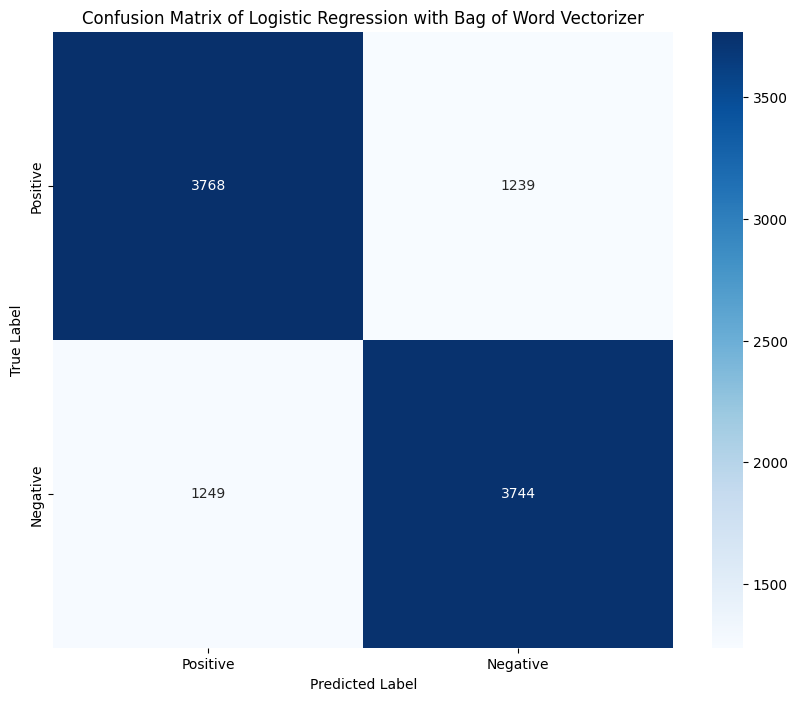

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


plt.figure(figsize=(10, 8))
sns.heatmap(cm_bow, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', "Negative"], yticklabels=['Positive', "Negative"])
plt.title(f'Confusion Matrix of Logistic Regression with Bag of Word Vectorizer')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

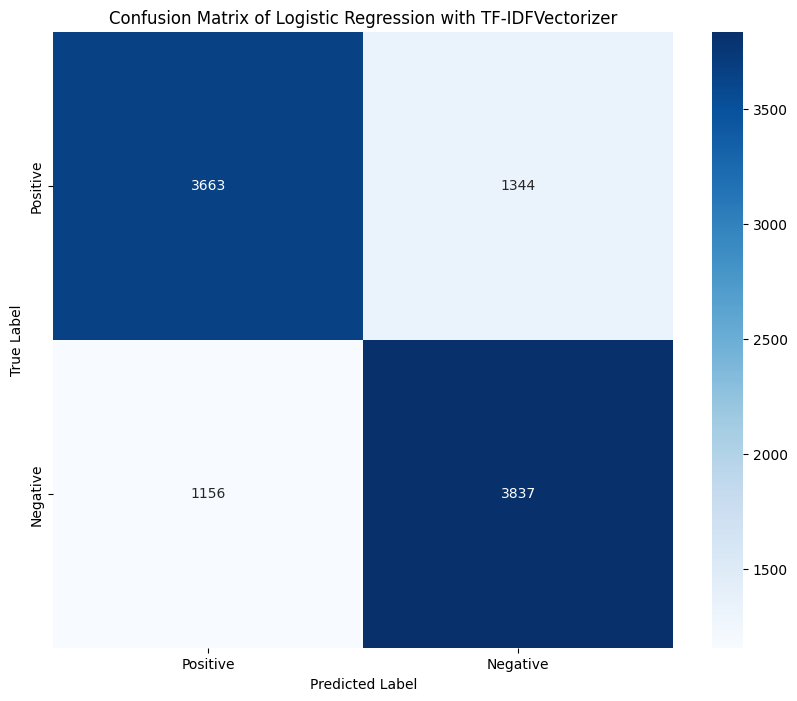

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


plt.figure(figsize=(10, 8))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', "Negative"], yticklabels=['Positive', "Negative"])
plt.title(f'Confusion Matrix of Logistic Regression with TF-IDFVectorizer')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Multinomial Naive Bayes

In [ ]:
# with Bow vectorizer
mnb=MultinomialNB()
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
# with TF-IDF vectorizer
print(mnb_bow)
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


In [ ]:
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


In [ ]:
mnb_bow_predict=mnb.predict(cv_test_reviews)
mnb_tfidf_predict=mnb.predict(tv_test_reviews)

In [ ]:
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.751
mnb_tfidf_score : 0.7509


In [ ]:
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.75      0.74      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [ ]:
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])

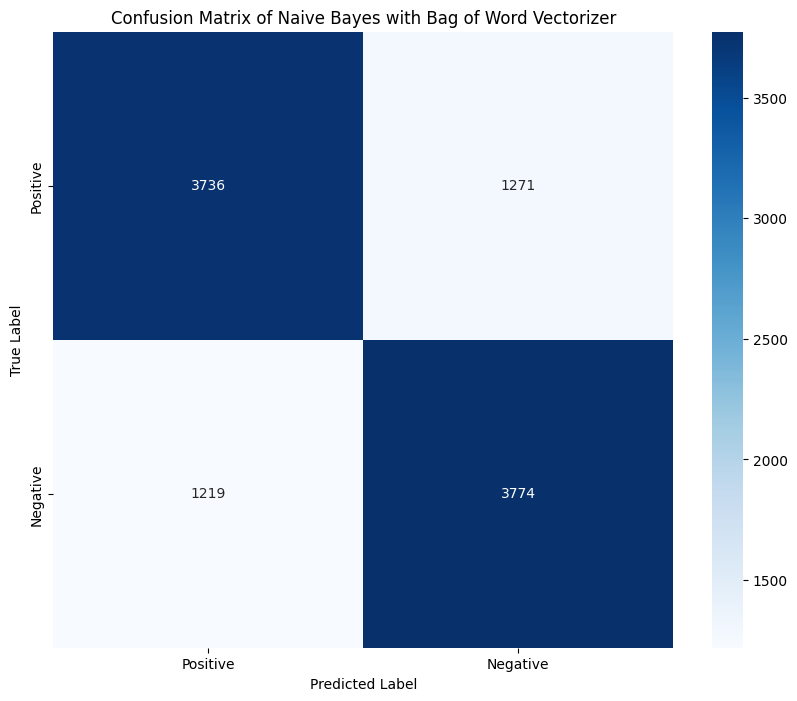

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


plt.figure(figsize=(10, 8))
sns.heatmap(cm_bow, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', "Negative"], yticklabels=['Positive', "Negative"])
plt.title(f'Confusion Matrix of Naive Bayes with Bag of Word Vectorizer')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

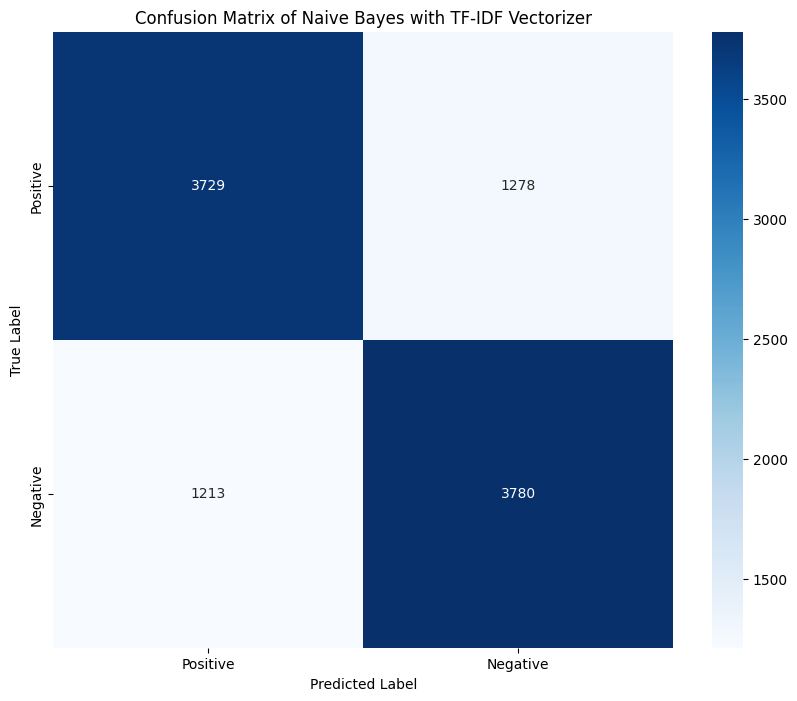

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


plt.figure(figsize=(10, 8))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', "Negative"], yticklabels=['Positive', "Negative"])
plt.title(f'Confusion Matrix of Naive Bayes with TF-IDF Vectorizer')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Deep Learning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
stopwords = set(stopwords.words('english'))
import torch
from torch import nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import classification_report, confusion_matrix
import os
from tqdm import tqdm
tqdm.pandas()
from collections import Counter
import torch.nn.functional as F

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Data_NLP/IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
def transform_label(label):
    return 1 if label == 'positive' else 0
data['label'] = data['sentiment'].progress_apply(transform_label)
data.head()

100%|██████████| 50000/50000 [00:00<00:00, 473936.94it/s]


,review,sentiment,label
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [ ]:

data['token_length'] = data.review.progress_apply(lambda x: len(x.split()))
data_pos = data[data['label'] == 1]
data_pos['token_length'].describe()

100%|██████████| 50000/50000 [00:00<00:00, 58156.94it/s]


count    25000.000000
mean       232.849320
std        177.497046
min         10.000000
25%        125.000000
50%        172.000000
75%        284.000000
max       2470.000000
Name: token_length, dtype: float64

In [ ]:
data_neg = data[data['label'] == 0]
data_neg['token_length'].describe()

count    25000.000000
mean       229.464560
std        164.947795
min          4.000000
25%        128.000000
50%        174.000000
75%        278.000000
max       1522.000000
Name: token_length, dtype: float64

<Figure size 500x800 with 0 Axes>

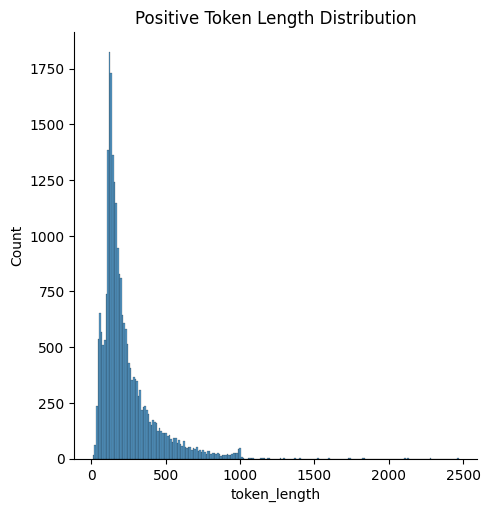

In [ ]:
plt.figure(figsize=(5, 8))
sns.displot(data_pos, x='token_length')
plt.title('Positive Token Length Distribution')
plt.show()

<Figure size 500x800 with 0 Axes>

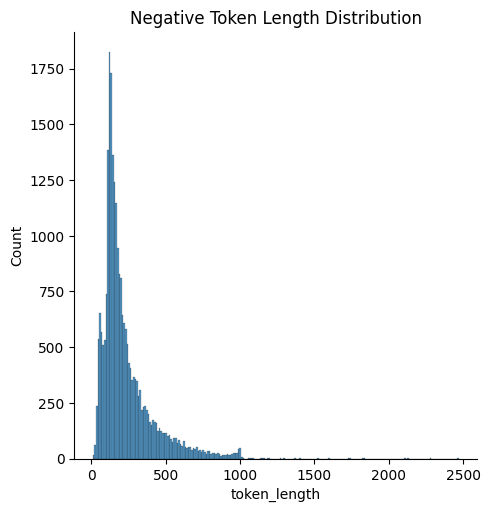

In [ ]:
plt.figure(figsize=(5, 8))
sns.displot(data_pos, x='token_length')
plt.title('Negative Token Length Distribution')
plt.show()

In [ ]:
def rm_link(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)
def rm_punct2(text):
    return re.sub(r'[\"\#\$\%\&\'\(\)\*\+\/\:\;\<\=\>\@\[\\\]\^\_\`\{\|\}\~]', ' ', text)
def rm_html(text):
    return re.sub(r'<[^>]+>', '', text)
def space_bt_punct(text):
    pattern = r'([.,!?-])'
    s = re.sub(pattern, r' \1 ', text)
    s = re.sub(r'\s{2,}', ' ', s)
    return s
def rm_number(text):
    return re.sub(r'\d+', '', text)
def rm_whitespaces(text):
    return re.sub(r' +', ' ', text)
def rm_nonascii(text):
    return re.sub(r'[^\x00-\x7f]', r'', text)
def rm_emoji(text):
    emojis = re.compile(
        '['
        u'\U0001F600-\U0001F64F'
        u'\U0001F300-\U0001F5FF'
        u'\U0001F680-\U0001F6FF'
        u'\U0001F1E0-\U0001F1FF'
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE
    )
    return emojis.sub(r'', text)
def spell_correction(text):
    return re.sub(r'(.)\1+', r'\1\1', text)
def clean_pipeline(text):
    no_link = rm_link(text)
    no_html = rm_html(no_link)
    space_punct = space_bt_punct(no_html)
    no_punct = rm_punct2(space_punct)
    no_number = rm_number(no_punct)
    no_whitespaces = rm_whitespaces(no_number)
    no_nonasci = rm_nonascii(no_whitespaces)
    no_emoji = rm_emoji(no_nonasci)
    spell_corrected = spell_correction(no_emoji)
    return spell_corrected

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
def tokenize(text):
    return word_tokenize(text)
def rm_stopwords(text):
    return [i for i in text if i not in stopwords]
def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(t) for t in text]
    return rm_stopwords(lemmas)
def preprocess_pipeline(text):
    tokens = tokenize(text)
    no_stopwords = rm_stopwords(tokens)
    lemmas = lemmatize(no_stopwords)
    return ' '.join(lemmas)

In [ ]:
data['clean'] = data['review'].progress_apply(clean_pipeline)
data['processed'] = data['clean'].progress_apply(preprocess_pipeline)
data.head()

100%|██████████| 50000/50000 [02:01<00:00, 412.76it/s]


,review,sentiment,label,token_length,clean,processed
0,One of the other reviewers has mentioned that ...,positive,1,307,One of the other reviewers has mentioned that ...,One reviewer mentioned watching Oz episode hoo...
1,A wonderful little production. <br /><br />The...,positive,1,162,A wonderful little production . The filming te...,A wonderful little production . The filming te...
2,I thought this was a wonderful way to spend ti...,positive,1,166,I thought this was a wonderful way to spend ti...,I thought wonderful way spend time hot summer ...
3,Basically there's a family where a little boy ...,negative,0,138,Basically there s a family where a little boy ...,Basically family little boy Jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,230,Petter Mattei s Love in the Time of Money is a...,Petter Mattei Love Time Money visually stunnin...


In [ ]:
data[['processed', 'label']].to_csv('IMDB_Dataset_cleaned.csv', index=False, header=True)

In [ ]:
reviews = data.processed.values
words = ' '.join(reviews)
words = words.split()
words[:10]

['One',
 'reviewer',
 'mentioned',
 'watching',
 'Oz',
 'episode',
 'hooked',
 '.',
 'They',
 'right']

Adding pad token

In [ ]:
counter = Counter(words)
vocab = sorted(counter, key=counter.get, reverse=True)
int2word = dict(enumerate(vocab, 1))
int2word[0] = '<PAD>'
word2int = {word: id for id, word in int2word.items()}

In [ ]:
reviews_enc = [[word2int[word] for word in review.split()] for review in tqdm(reviews)]
for i in range(5):
    print(reviews_enc[i][:5])

100%|██████████| 50000/50000 [00:01<00:00, 27999.90it/s]

[191, 1083, 930, 81, 3724]
[47, 328, 59, 244, 1]
[3, 95, 328, 30, 1041]
[2408, 136, 59, 241, 3230]
[70982, 10566, 1081, 1941, 7538]


In [ ]:
word2int['data']

9806

In [ ]:
def pad_features(reviews, pad_id, seq_length=128):
    features = np.full((len(reviews), seq_length), pad_id, dtype=int)
    for i, row in enumerate(reviews):
        features[i, :len(row)] = np.array(row)[:seq_length]
    return features
seq_length = 256
features = pad_features(reviews_enc, pad_id=word2int['<PAD>'], seq_length=seq_length)
assert len(features) == len(reviews_enc)
assert len(features[0]) == seq_length
features[:10, :10]

array([[  191,  1083,   930,    81,  3724,   186,  3030,     1,   118,
          114],
       [   47,   328,    59,   244,     1,     7,  1267,  1608, 17875,
            4],
       [    3,    95,   328,    30,  1041,    13,   845,  1774,  2633,
            2],
       [ 2408,   136,    59,   241,  3230,    37,   650,  4298,   583,
          882],
       [70982, 10566,  1081,  1941,  7538,  2280,  1313,     6,    46,
            1],
       [ 2795,     4,    13,   368,     5,     2,    17, 42503,     2,
         2952],
       [    3,   197,    18,    10,    21, 12517,  1904, 55922,   121,
         5112],
       [   14,    31,   427,     2,  1342,  4021,   165,    34,  2960,
            1],
       [47893,   980,   359,     6,     3,   180,   776,    81,     6,
            1],
       [   64,    10,   125,  2269,  5606,  1980,    10,     5,     1,
           64]])

In [ ]:
labels = data.label.to_numpy()
labels

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_size = 0.7
val_size = 0.5
split_id = int(len(features) * train_size)
train_x, remain_x = features[:split_id], features[split_id:]
train_y, remain_y = labels[:split_id], labels[split_id:]
split_val_id = int(len(remain_x) * val_size)
val_x, test_x = remain_x[:split_val_id], remain_x[split_val_id:]
val_y, test_y = remain_y[:split_val_id], remain_y[split_val_id:]
print('Feature Shapes:')
print('Train set: {}'.format(train_x.shape))
print('Validation set: {}'.format(val_x.shape))
print('Test set: {}'.format(test_x.shape))

Feature Shapes:
Train set: (35000, 256)
Validation set: (7500, 256)
Test set: (7500, 256)


In [ ]:
print(len(train_y[train_y == 0]), len(train_y[train_y == 1]))
print(len(val_y[val_y == 0]), len(val_y[val_y == 1]))
print(len(test_y[test_y == 0]), len(test_y[test_y == 1]))

17510 17490
3753 3747
3737 3763


In [ ]:
batch_size = 128
trainset = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
validset = TensorDataset(torch.from_numpy(val_x), torch.from_numpy(val_y))
testset = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))
trainloader = DataLoader(trainset, shuffle=True, batch_size=batch_size)
valloader = DataLoader(validset, shuffle=True, batch_size=batch_size)
testloader = DataLoader(testset, shuffle=True, batch_size=batch_size)

In [ ]:

x, y = next(iter(trainloader))
print('Sample batch size: ', x.size())
print('Sample batch input: \n', x)
print()
print('Sample label size: ', y.size())
print('Sample label input: \n', y)

Sample batch size:  torch.Size([128, 256])
Sample batch input: 
 tensor([[   58,   998,   242,  ...,     0,     0,     0],
        [  115,  6232, 97769,  ...,    24,     1, 23866],
        [    3,   141,    46,  ...,     0,     0,     0],
        ...,
        [  191,     5,   139,  ...,     0,     0,     0],
        [  219,   214,     3,  ...,     0,     0,     0],
        [ 6267,     2,   611,  ...,     0,     0,     0]])

Sample label size:  torch.Size([128])
Sample label input: 
 tensor([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0])


### TextCNN model

In [ ]:
# ====== Convolutional Neural Network Model ======
class TextCNN(nn.Module):

  def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, dropout):
    super(TextCNN,self).__init__()
    #Embedding layer
    self.embedding = nn.Embedding(vocab_size, embedding_dim)
    #Conv Network
    # in_channels: the number of "channels" in the image going into the convolutional layer
    # out_channels: the number of filters
    # the kernel_size: the size of the filters. Each of the kernel_sizes is going to be [n x emb_dim] where n is the size of the n-grams
    self.convs = nn.ModuleList([nn.Conv2d(in_channels = 1, out_channels = n_filters, kernel_size = (fs, embedding_dim)) for fs in filter_sizes])
    #Fully  connected +Dropout
    self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
    self.dropout = nn.Dropout(dropout)

  def forward(self, text):
    #input text is permuted to have the batch size as the first dimension
    # text = text.permute(1, 0)
    #text is embedded, and dropout is applied
    embedded = self.dropout(self.embedding(text))
    embedded = embedded.unsqueeze(1)
    #Convolution and ReLU activation are applied to each filter size.
    conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]
    #1D max pooling is performed over the width of each feature map
    pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
    #Pooled feature maps are concatenated and passed through dropout
    cat = self.dropout(torch.cat(pooled, dim = 1))
    #result is passed through the fully connected layer to get the final output
    return self.fc(cat)

### distill BERT

In [ ]:
# Define Trainer parameters
def compute_metrics(p):

  pred, labels = p
  pred = np.argmax(pred, axis=1)

  accuracy = accuracy_score(y_true=labels, y_pred=pred)
  recall = recall_score(y_true=labels, y_pred=pred)
  precision = precision_score(y_true=labels, y_pred=pred)
  f1 = f1_score(y_true=labels, y_pred=pred)
  return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

In [ ]:
from transformers import EarlyStoppingCallback
from transformers import DistilBertTokenizerFast
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:

# Define the pre-trained model from Hugging Face and its tokenizer
model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizerFast.from_pretrained(model_name)
model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels = 2)
model.to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 5.4 MB/s eta 0:00:00


In [ ]:
!pip install transformers[torch]

In [ ]:
!pip install accelerate==0.20.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.5/227.5 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.26.1
    Uninstalling accelerate-0.26.1:
      Successfully uninstalled accelerate-0.26.1


## LSTM-Attention

In [ ]:
class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.attn = nn.Linear(hidden_dim, 1, bias=False)

    def forward(self, lstm_output):
        # lstm_output = [batch size, seq_len, hidden_dim]
        attention_scores = self.attn(lstm_output)
        # attention_scores = [batch size, seq_len, 1]
        attention_scores = attention_scores.squeeze(2)
        # attention_scores = [batch size, seq_len]
        return F.softmax(attention_scores, dim=1)


In [ ]:
class LSTM_ATT(nn.Module):
    def __init__(
        self,
        vocab_size,
        embedding_dim=128,
        hidden_dim=256,
        output_dim=1,
        n_layers=2,
        bidirectional=True,
        dropout=0.1,
    ):
        super(LSTM_ATT,self).__init__()


        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim)


        # attention
        self.attention = Attention(hidden_dim * 2 if bidirectional else hidden_dim)


        # LSTM layer
        self.lstm = nn.LSTM(
            embedding_dim,
            hidden_dim,
            num_layers=n_layers,
            bidirectional=bidirectional,
            dropout=dropout,
            batch_first=True,
        )


        # Dense layer
        self.fc = nn.Sequential(
            nn.Linear(hidden_dim * 2, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim),
        )
        # self.fc1 = nn.Linear(hidden_dim * 2, hidden_dim)
        # self.relu = nn.ReLU()
        # self.fc2 = nn.Linear(hidden_dim, output_dim)



        # Activation function
        self.act = nn.Sigmoid()


    def forward(self, text):

        # text = [batch size, sent_length]
        embedded = self.embedding(text)
        lstm_output, (hidden, _) = self.lstm(embedded)
        # lstm_output = [batch size, seq_len, hidden_dim*num_directions]
        # concat the final forward and backward hidden state
        hidden = torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1)
        attention_weights = self.attention(lstm_output)
        # attention_weights = [batch size, seq_len]
        attention_weights = attention_weights.unsqueeze(2)
        weighted = lstm_output * attention_weights
        # weighted = [batch size, seq_len, hidden_dim]


        weighted_sum = weighted.sum(dim=1)
        # weighted_sum = [batch size, hidden_dim]


        out = self.fc(weighted_sum)
        # out = self.relu(out)
        # output = self.fc2(out)

        # dense_outputs = [batch size, output_dim]


        # Final activation function
        outputs = self.act(out)


        return outputs


In [ ]:
vocab_size = len(word2int)
output_size = 1
embedding_size = 30
hidden_size = 16
n_layers = 2
dropout=0.25

In [ ]:
lstm_att = SentimentClassifierWithSoftAttention(vocab_size=vocab_size, embedding_dim=embedding_size, hidden_dim=hidden_size, n_layers=n_layers, dropout=dropout)
lstm_att.eval()

SentimentClassifierWithSoftAttention(
  (embedding): Embedding(121301, 30)
  (attention): Attention(
    (attn): Linear(in_features=32, out_features=1, bias=False)
  )
  (lstm): LSTM(30, 16, num_layers=2, batch_first=True, dropout=0.25, bidirectional=True)
  (fc): Sequential(
    (0): Linear(in_features=32, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
  (act): Sigmoid()
)

In [ ]:
summary(lstm_att, x.size())

Layer (type:depth-idx)                   Output Shape              Param #
SentimentClassifierWithSoftAttention     [128, 1]                  --
├─Embedding: 1-1                         [128, 256, 30]            3,639,030
├─LSTM: 1-2                              [128, 256, 32]            12,544
├─Attention: 1-3                         [128, 256]                --
│    └─Linear: 2-1                       [128, 256, 1]             32
├─Sequential: 1-4                        [128, 1]                  --
│    └─Linear: 2-2                       [128, 16]                 528
│    └─ReLU: 2-3                         [128, 16]                 --
│    └─Linear: 2-4                       [128, 1]                  17
├─Sigmoid: 1-5                           [128, 1]                  --
Total params: 3,652,151
Trainable params: 3,652,151
Non-trainable params: 0
Total mult-adds (M): 876.91
Input size (MB): 0.13
Forward/backward pass size (MB): 16.53
Params size (MB): 14.61
Estimated Total Size (MB

## Sentiment Model

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
class SentimentModel(nn.Module):
    def __init__(self, vocab_size, output_size, hidden_size=128, embedding_size=400, n_layers=2, dropout=0.2):
        super(SentimentModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_size)
        self.lstm = nn.LSTM(embedding_size, hidden_size, n_layers, dropout=dropout, batch_first=True)
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = x.long()
        x = self.embedding(x)
        o, _ =  self.lstm(x)
        o = o[:, -1, :]
        o = self.dropout(o)
        o = self.fc(o)
        o = self.sigmoid(o)
        return o

In [ ]:
! pip install torchinfo

In [ ]:
from torchinfo import summary

LSTM sentimentModel

In [ ]:
vocab_size = len(word2int)
output_size = 1
embedding_size = 30
hidden_size = 16
n_layers = 2
dropout=0.25
model = SentimentModel(vocab_size, output_size, hidden_size, embedding_size, n_layers, dropout)
print(model)

SentimentModel(
  (embedding): Embedding(121301, 30)
  (lstm): LSTM(30, 16, num_layers=2, batch_first=True, dropout=0.25)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=16, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [ ]:
summary(model, x.size())

Layer (type:depth-idx)                   Output Shape              Param #
SentimentModel                           [128, 1]                  --
├─Embedding: 1-1                         [128, 256, 30]            3,639,030
├─LSTM: 1-2                              [128, 256, 16]            5,248
├─Dropout: 1-3                           [128, 16]                 --
├─Linear: 1-4                            [128, 1]                  17
├─Sigmoid: 1-5                           [128, 1]                  --
Total params: 3,644,295
Trainable params: 3,644,295
Non-trainable params: 0
Total mult-adds (M): 637.76
Input size (MB): 0.13
Forward/backward pass size (MB): 12.06
Params size (MB): 14.58
Estimated Total Size (MB): 26.77

TextCNN model

In [ ]:
# vocab_size = len(word2int)
# output_size = 1
# embedding_size = 30
# hidden_size = 16
# n_layers = 2
# dropout=0.25
# model = TextCNN(vocab_size=vocab_size, embedding_dim= embedding_size, n_filters=6, filter_sizes=[3, 5, 7], output_dim=output_size, dropout=dropout)
# print(model)

Set up for training

In [ ]:
lr = 0.001
criterion = nn.BCELoss()
optim = Adam(model.parameters(), lr=lr)
grad_clip = 5
epochs = 20
print_every = 1
history = {
    'train_loss': [],
    'train_acc': [],
    'val_loss': [],
    'val_acc': [],
    'epochs': epochs
}
es_limit = 5

## LSTM training

In [ ]:
model = model.to(device)
epochloop = tqdm(range(epochs), position=0, desc='Training', leave=True)
es_trigger = 0
val_loss_min = torch.inf
for e in epochloop:
    model.train()
    train_loss = 0
    train_acc = 0
    for id, (feature, target) in enumerate(trainloader):
        epochloop.set_postfix_str(f'Training batch {id}/{len(trainloader)}')
        feature, target = feature.to(device), target.to(device)
        optim.zero_grad()
        out = model(feature)
        predicted = torch.tensor([1 if i == True else 0 for i in out > 0.5], device=device)
        equals = predicted == target
        acc = torch.mean(equals.type(torch.FloatTensor))
        train_acc += acc.item()
        loss = criterion(out.squeeze(), target.float())
        train_loss += loss.item()
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), grad_clip)
        optim.step()
        del feature, target, predicted
    history['train_loss'].append(train_loss / len(trainloader))
    history['train_acc'].append(train_acc / len(trainloader))
    model.eval()
    val_loss = 0
    val_acc = 0
    with torch.no_grad():
        for id, (feature, target) in enumerate(valloader):
            epochloop.set_postfix_str(f'Validation batch {id}/{len(valloader)}')
            feature, target = feature.to(device), target.to(device)
            out = model(feature)
            predicted = torch.tensor([1 if i == True else 0 for i in out > 0.5], device=device)
            equals = predicted == target
            acc = torch.mean(equals.type(torch.FloatTensor))
            val_acc += acc.item()
            loss = criterion(out.squeeze(), target.float())
            val_loss += loss.item()
            del feature, target, predicted
        history['val_loss'].append(val_loss / len(valloader))
        history['val_acc'].append(val_acc / len(valloader))
    model.train()
    epochloop.set_postfix_str(f'Val Loss: {val_loss / len(valloader):.3f} | Val Acc: {val_acc / len(valloader):.3f}')
    if (e+1) % print_every == 0:
        epochloop.write(f'Epoch {e+1}/{epochs} | Train Loss: {train_loss / len(trainloader):.3f} Train Acc: {train_acc / len(trainloader):.3f} | Val Loss: {val_loss / len(valloader):.3f} Val Acc: {val_acc / len(valloader):.3f}')
        epochloop.update()
    if val_loss / len(valloader) <= val_loss_min:
        torch.save(model.state_dict(), './sentiment_lstm.pt')
        val_loss_min = val_loss / len(valloader)
        es_trigger = 0
    else:
        epochloop.write(f'[WARNING] Validation loss did not improved ({val_loss_min:.3f} --> {val_loss / len(valloader):.3f})')
        es_trigger += 1
    if es_trigger >= es_limit:
        epochloop.write(f'Early stopped at Epoch-{e+1}')
        history['epochs'] = e+1
        break

Training:  10%|█         | 2/20 [00:04<01:20,  4.48s/it, Training batch 15/274]

Epoch 1/20 | Train Loss: 0.694 Train Acc: 0.498 | Val Loss: 0.693 Val Acc: 0.510


Training:  20%|██        | 4/20 [00:08<00:39,  2.45s/it, Training batch 14/274]

Epoch 2/20 | Train Loss: 0.693 Train Acc: 0.507 | Val Loss: 0.693 Val Acc: 0.509


Training:  25%|██▌       | 5/20 [00:11<00:32,  2.15s/it, Training batch 9/274]

Epoch 3/20 | Train Loss: 0.691 Train Acc: 0.509 | Val Loss: 0.690 Val Acc: 0.512


Training:  35%|███▌      | 7/20 [00:16<00:35,  2.72s/it, Training batch 14/274]

Epoch 4/20 | Train Loss: 0.679 Train Acc: 0.536 | Val Loss: 0.683 Val Acc: 0.535


Training:  40%|████      | 8/20 [00:19<00:27,  2.30s/it, Training batch 14/274]

Epoch 5/20 | Train Loss: 0.665 Train Acc: 0.558 | Val Loss: 0.668 Val Acc: 0.645


Training:  45%|████▌     | 9/20 [00:23<00:28,  2.60s/it, Training batch 14/274]

Epoch 6/20 | Train Loss: 0.618 Train Acc: 0.675 | Val Loss: 0.621 Val Acc: 0.691


Training:  55%|█████▌    | 11/20 [00:27<00:27,  3.06s/it, Training batch 9/274]

Epoch 7/20 | Train Loss: 0.571 Train Acc: 0.730 | Val Loss: 0.582 Val Acc: 0.733


Training:  60%|██████    | 12/20 [00:31<00:20,  2.53s/it, Training batch 13/274]

Epoch 8/20 | Train Loss: 0.495 Train Acc: 0.791 | Val Loss: 0.527 Val Acc: 0.765


Training:  65%|██████▌   | 13/20 [00:34<00:19,  2.76s/it, Training batch 14/274]

Epoch 9/20 | Train Loss: 0.422 Train Acc: 0.832 | Val Loss: 0.496 Val Acc: 0.788


Training:  70%|███████   | 14/20 [00:38<00:18,  3.01s/it, Training batch 10/274]

Epoch 10/20 | Train Loss: 0.366 Train Acc: 0.862 | Val Loss: 0.478 Val Acc: 0.794


Training:  80%|████████  | 16/20 [00:42<00:13,  3.32s/it, Training batch 13/274]

Epoch 11/20 | Train Loss: 0.324 Train Acc: 0.885 | Val Loss: 0.457 Val Acc: 0.817


Training:  85%|████████▌ | 17/20 [00:46<00:07,  2.67s/it, Training batch 17/274]

Epoch 12/20 | Train Loss: 0.316 Train Acc: 0.896 | Val Loss: 0.477 Val Acc: 0.813
[WARNING] Validation loss did not improved (0.457 --> 0.477)


Training:  90%|█████████ | 18/20 [00:49<00:05,  2.86s/it, Training batch 16/274]

Epoch 13/20 | Train Loss: 0.295 Train Acc: 0.906 | Val Loss: 0.489 Val Acc: 0.806
[WARNING] Validation loss did not improved (0.457 --> 0.489)


Training:  95%|█████████▌| 19/20 [00:54<00:03,  3.20s/it, Training batch 11/274]

Epoch 14/20 | Train Loss: 0.264 Train Acc: 0.915 | Val Loss: 0.505 Val Acc: 0.824
[WARNING] Validation loss did not improved (0.457 --> 0.505)


Training: 100%|██████████| 20/20 [00:57<00:00,  3.32s/it, Training batch 16/274]

Epoch 15/20 | Train Loss: 0.242 Train Acc: 0.924 | Val Loss: 0.481 Val Acc: 0.825
[WARNING] Validation loss did not improved (0.457 --> 0.481)


Training:  75%|███████▌  | 15/20 [01:01<00:20,  4.07s/it, Val Loss: 0.494 | Val Acc: 0.827]

Epoch 16/20 | Train Loss: 0.221 Train Acc: 0.933 | Val Loss: 0.494 Val Acc: 0.827
[WARNING] Validation loss did not improved (0.457 --> 0.494)
Early stopped at Epoch-16


In [ ]:
model.eval()
test_loss = 0
test_acc = 0
all_target = []
all_predicted = []
testloop = tqdm(testloader, leave=True, desc='Inference')
with torch.no_grad():
    for feature, target in testloop:
        feature, target = feature.to(device), target.to(device)
        out = model(feature)
        predicted = torch.tensor([1 if i == True else 0 for i in out > 0.5], device=device)
        equals = predicted == target
        acc = torch.mean(equals.type(torch.FloatTensor))
        test_acc += acc.item()
        loss = criterion(out.squeeze(), target.float())
        test_loss += loss.item()
        all_target.extend(target.cpu().numpy())
        all_predicted.extend(predicted.cpu().numpy())
    print(f'Accuracy: {test_acc/len(testloader):.4f}, Loss: {test_loss/len(testloader):.4f}')

Inference: 100%|██████████| 59/59 [00:00<00:00, 152.00it/s]

Accuracy: 0.8276, Loss: 0.4977


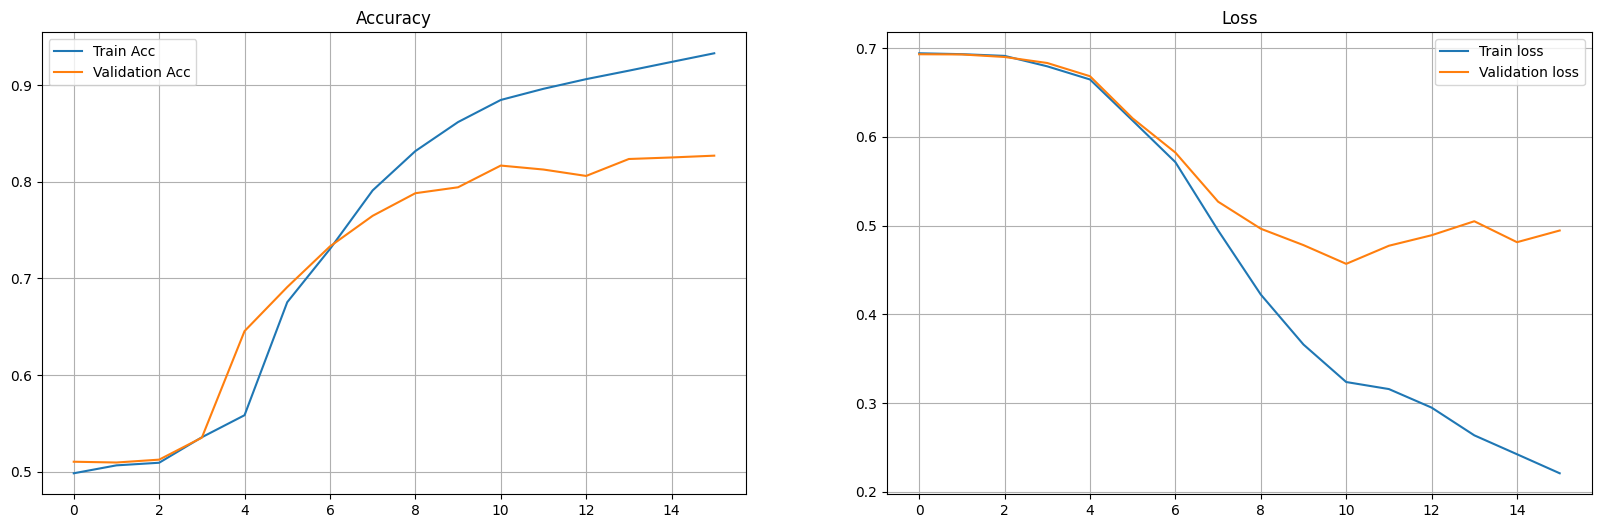

In [ ]:
fig = plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.plot(history['train_acc'], label='Train Acc')
plt.plot(history['val_acc'], label='Validation Acc')
plt.title("Accuracy")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history['train_loss'], label='Train loss')
plt.plot(history['val_loss'], label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()

plt.show()

In [ ]:
print(classification_report(all_predicted, all_target))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      3941
           1       0.80      0.85      0.82      3559

    accuracy                           0.83      7500
   macro avg       0.83      0.83      0.83      7500
weighted avg       0.83      0.83      0.83      7500



In [ ]:
cm = confusion_matrix(all_predicted, all_target)

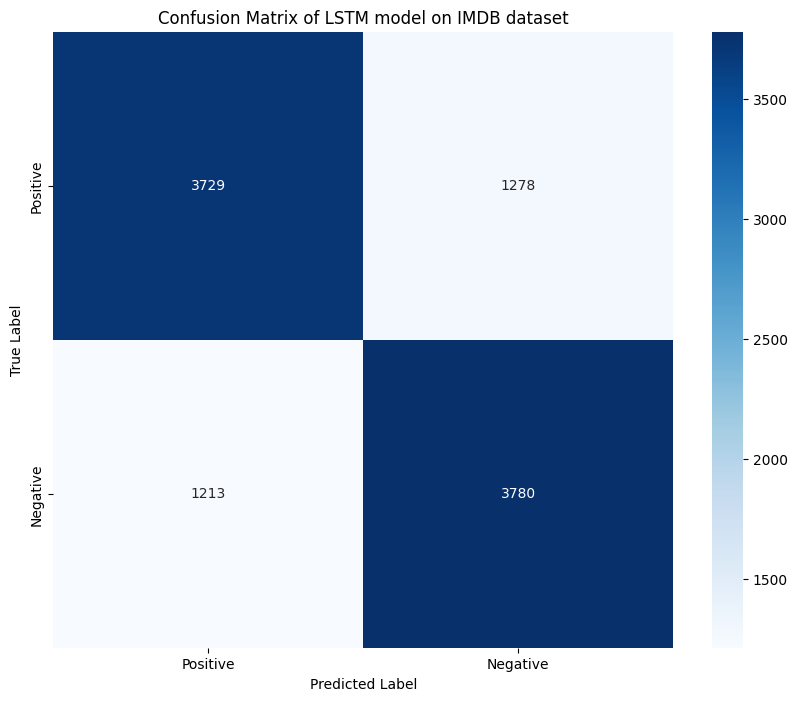

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


plt.figure(figsize=(10, 8))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', "Negative"], yticklabels=['Positive', "Negative"])
plt.title(f'Confusion Matrix of LSTM model on IMDB dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## LSTM-Attention training

In [ ]:
vocab_size = len(word2int)
output_size = 1
embedding_size = 30
hidden_size = 16
n_layers = 2
dropout=0.25

In [ ]:
lstm_att = LSTM_ATT(vocab_size=vocab_size, embedding_dim=embedding_size, hidden_dim=hidden_size, n_layers=n_layers, dropout=dropout)
lstm_att.eval()

LSTM_ATT(
  (embedding): Embedding(121301, 30)
  (attention): Attention(
    (attn): Linear(in_features=32, out_features=1, bias=False)
  )
  (lstm): LSTM(30, 16, num_layers=2, batch_first=True, dropout=0.25, bidirectional=True)
  (fc): Sequential(
    (0): Linear(in_features=32, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
  (act): Sigmoid()
)

In [ ]:
lr = 0.001
criterion = nn.BCELoss()
optim = Adam(lstm_att.parameters(), lr=lr)
grad_clip = 5
epochs = 20
print_every = 1
history = {
    'train_loss': [],
    'train_acc': [],
    'val_loss': [],
    'val_acc': [],
    'epochs': epochs
}
es_limit = 5

In [ ]:
model = lstm_att.to(device)
epochloop = tqdm(range(epochs), position=0, desc='Training', leave=True)
es_trigger = 0
val_loss_min = torch.inf
for e in epochloop:
    model.train()
    train_loss = 0
    train_acc = 0
    for id, (feature, target) in enumerate(trainloader):
        epochloop.set_postfix_str(f'Training batch {id}/{len(trainloader)}')
        feature, target = feature.to(device), target.to(device)
        optim.zero_grad()
        out = model(feature)
        predicted = torch.tensor([1 if i == True else 0 for i in out > 0.5], device=device)
        equals = predicted == target
        acc = torch.mean(equals.type(torch.FloatTensor))
        train_acc += acc.item()
        loss = criterion(out.squeeze(), target.float())
        train_loss += loss.item()
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), grad_clip)
        optim.step()
        del feature, target, predicted
    history['train_loss'].append(train_loss / len(trainloader))
    history['train_acc'].append(train_acc / len(trainloader))
    model.eval()
    val_loss = 0
    val_acc = 0
    with torch.no_grad():
        for id, (feature, target) in enumerate(valloader):
            epochloop.set_postfix_str(f'Validation batch {id}/{len(valloader)}')
            feature, target = feature.to(device), target.to(device)
            out = model(feature)
            predicted = torch.tensor([1 if i == True else 0 for i in out > 0.5], device=device)
            equals = predicted == target
            acc = torch.mean(equals.type(torch.FloatTensor))
            val_acc += acc.item()
            loss = criterion(out.squeeze(), target.float())
            val_loss += loss.item()
            del feature, target, predicted
        history['val_loss'].append(val_loss / len(valloader))
        history['val_acc'].append(val_acc / len(valloader))
    model.train()
    epochloop.set_postfix_str(f'Val Loss: {val_loss / len(valloader):.3f} | Val Acc: {val_acc / len(valloader):.3f}')
    if (e+1) % print_every == 0:
        epochloop.write(f'Epoch {e+1}/{epochs} | Train Loss: {train_loss / len(trainloader):.3f} Train Acc: {train_acc / len(trainloader):.3f} | Val Loss: {val_loss / len(valloader):.3f} Val Acc: {val_acc / len(valloader):.3f}')
        epochloop.update()
    if val_loss / len(valloader) <= val_loss_min:
        torch.save(model.state_dict(), './sentiment_lstm.pt')
        val_loss_min = val_loss / len(valloader)
        es_trigger = 0
    else:
        epochloop.write(f'[WARNING] Validation loss did not improved ({val_loss_min:.3f} --> {val_loss / len(valloader):.3f})')
        es_trigger += 1
    if es_trigger >= es_limit:
        epochloop.write(f'Early stopped at Epoch-{e+1}')
        history['epochs'] = e+1
        break

Training:  10%|█         | 2/20 [00:04<01:09,  3.84s/it, Training batch 9/274]

Epoch 1/20 | Train Loss: 0.628 Train Acc: 0.618 | Val Loss: 0.492 Val Acc: 0.768


Training:  20%|██        | 4/20 [00:08<00:43,  2.74s/it, Training batch 13/274]

Epoch 2/20 | Train Loss: 0.408 Train Acc: 0.817 | Val Loss: 0.381 Val Acc: 0.829


Training:  25%|██▌       | 5/20 [00:12<00:34,  2.31s/it, Training batch 12/274]

Epoch 3/20 | Train Loss: 0.312 Train Acc: 0.870 | Val Loss: 0.341 Val Acc: 0.852


Training:  35%|███▌      | 7/20 [00:16<00:35,  2.74s/it, Training batch 12/274]

Epoch 4/20 | Train Loss: 0.252 Train Acc: 0.899 | Val Loss: 0.333 Val Acc: 0.858


Training:  40%|████      | 8/20 [00:21<00:30,  2.57s/it, Training batch 13/274]

Epoch 5/20 | Train Loss: 0.207 Train Acc: 0.921 | Val Loss: 0.330 Val Acc: 0.867


Training:  45%|████▌     | 9/20 [00:25<00:31,  2.87s/it, Training batch 15/274]

Epoch 6/20 | Train Loss: 0.169 Train Acc: 0.939 | Val Loss: 0.341 Val Acc: 0.865
[WARNING] Validation loss did not improved (0.330 --> 0.341)


Training:  55%|█████▌    | 11/20 [00:28<00:28,  3.12s/it, Training batch 14/274]

Epoch 7/20 | Train Loss: 0.132 Train Acc: 0.954 | Val Loss: 0.367 Val Acc: 0.869
[WARNING] Validation loss did not improved (0.330 --> 0.367)


Training:  60%|██████    | 12/20 [00:33<00:22,  2.76s/it, Training batch 10/274]

Epoch 8/20 | Train Loss: 0.105 Train Acc: 0.966 | Val Loss: 0.394 Val Acc: 0.867
[WARNING] Validation loss did not improved (0.330 --> 0.394)


Training:  65%|██████▌   | 13/20 [00:37<00:21,  3.03s/it, Training batch 15/274]

Epoch 9/20 | Train Loss: 0.079 Train Acc: 0.977 | Val Loss: 0.432 Val Acc: 0.868
[WARNING] Validation loss did not improved (0.330 --> 0.432)


Training:  45%|████▌     | 9/20 [00:40<00:50,  4.56s/it, Val Loss: 0.459 | Val Acc: 0.863] 

Epoch 10/20 | Train Loss: 0.060 Train Acc: 0.983 | Val Loss: 0.459 Val Acc: 0.863
[WARNING] Validation loss did not improved (0.330 --> 0.459)
Early stopped at Epoch-10


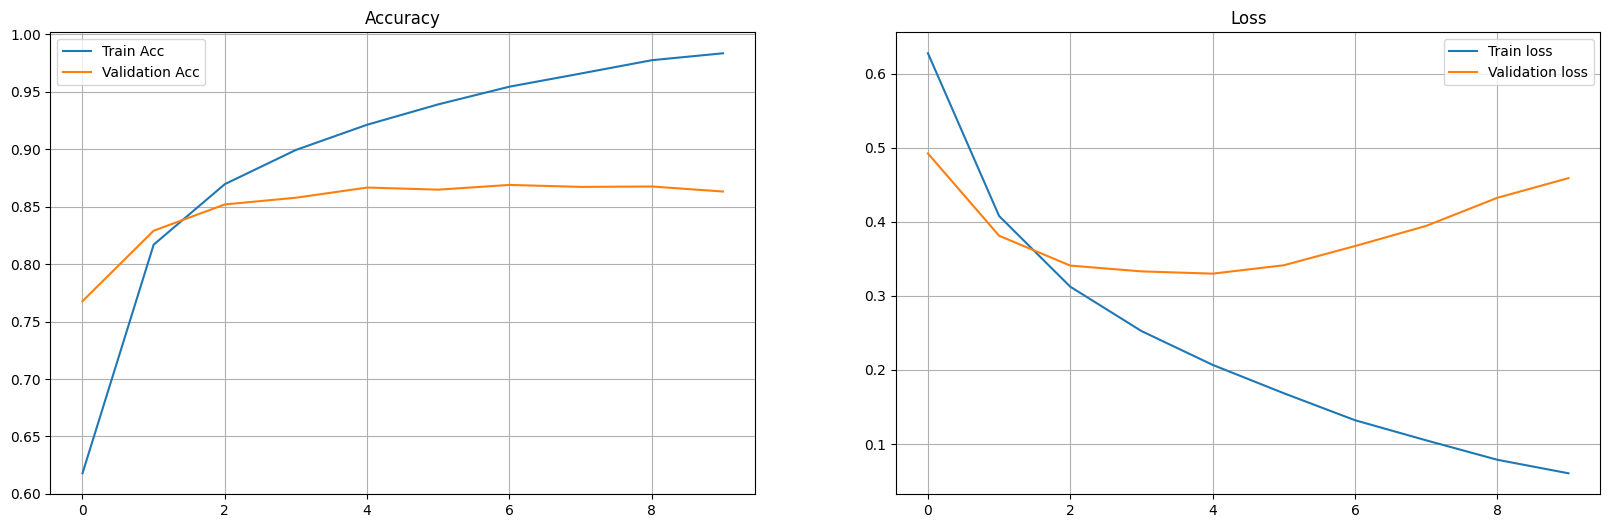

In [ ]:
fig = plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.plot(history['train_acc'], label='Train Acc')
plt.plot(history['val_acc'], label='Validation Acc')
plt.title("Accuracy")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history['train_loss'], label='Train loss')
plt.plot(history['val_loss'], label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()

plt.show()

In [ ]:
model.eval()
test_loss = 0
test_acc = 0
all_target = []
all_predicted = []
testloop = tqdm(testloader, leave=True, desc='Inference')
with torch.no_grad():
    for feature, target in testloop:
        feature, target = feature.to(device), target.to(device)
        out = model(feature)
        predicted = torch.tensor([1 if i == True else 0 for i in out > 0.5], device=device)
        equals = predicted == target
        acc = torch.mean(equals.type(torch.FloatTensor))
        test_acc += acc.item()
        loss = criterion(out.squeeze(), target.float())
        test_loss += loss.item()
        all_target.extend(target.cpu().numpy())
        all_predicted.extend(predicted.cpu().numpy())
    print(f'Accuracy: {test_acc/len(testloader):.4f}, Loss: {test_loss/len(testloader):.4f}')

Inference: 100%|██████████| 59/59 [00:00<00:00, 128.35it/s]

Accuracy: 0.8661, Loss: 0.4521


In [ ]:
cm = confusion_matrix(all_predicted, all_target)

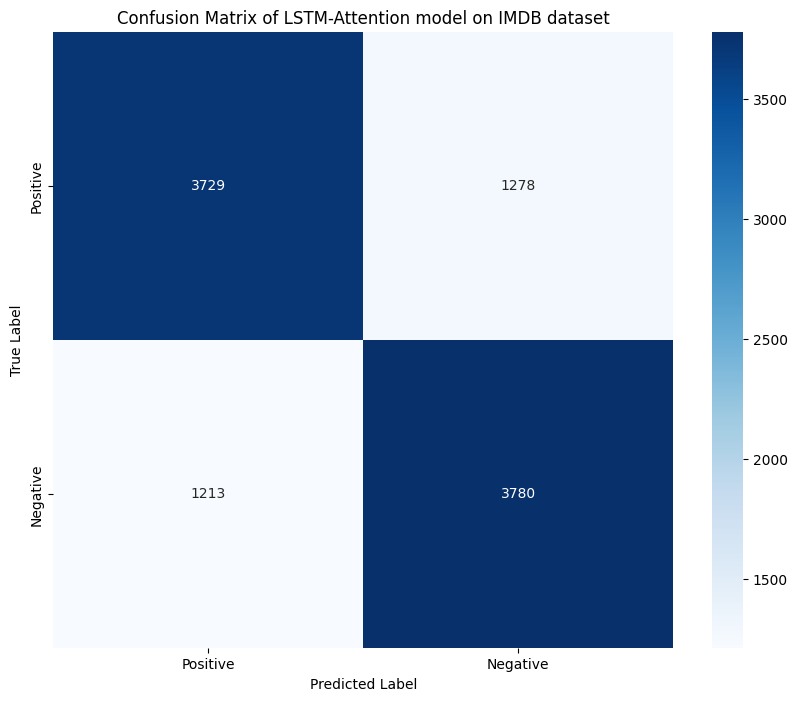

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


plt.figure(figsize=(10, 8))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', "Negative"], yticklabels=['Positive', "Negative"])
plt.title(f'Confusion Matrix of LSTM-Attention model on IMDB dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Inference

In [ ]:
reviews_enc = [[word2int[word] for word in review.split()] for review in tqdm(reviews)]

100%|██████████| 50000/50000 [00:01<00:00, 32869.82it/s]


In [ ]:
def preprocess_pipeline(text):
    tokens = tokenize(text)
    no_stopwords = rm_stopwords(tokens)
    lemmas = lemmatize(no_stopwords)
    return ' '.join(lemmas)

In [ ]:
text = """
My first exposure to the Templarios & not a good one. I was excited to find this title among the offerings from Anchor Bay Video, which has brought us other cult classics such as "Spider Baby". The print quality is excellent, but this alone can't hide the fact that the film is deadly dull. There's a thrilling opening sequence in which the villagers exact a terrible revenge on the Templars (& set the whole thing in motion), but everything else in the movie is slow, ponderous &, ultimately, unfulfilling. Adding insult to injury: the movie was dubbed, not subtitled, as promised on the video jacket.
"""

In [ ]:
word_seq = np.array([[word2int[preprocess_pipeline(word)]  for word in text.split() if preprocess_pipeline(word) in word2int.keys()]])

In [ ]:
word_seq

array([[  219,    34,  4985, 71013,    15,     3,  2153,    68,   312,
          696,  3031, 16590,  5818,   692,   110,  1123,   242,     7,
         2063,   330,   551,  1861,    96,     6,  2832,  3130,   517,
          308,  7541,  2472,   316,  1171, 29368,   126,   134,    33,
          224,   230,     5, 10684, 12892,  1802,     5,  4630,   266]])

In [ ]:
def pad_features(reviews, pad_id, seq_length=128):
    features = np.full((len(reviews), seq_length), pad_id, dtype=int)
    for i, row in enumerate(reviews):
        features[i, :len(row)] = np.array(row)[:seq_length]
    return features
seq_length = 256
features = pad_features(word_seq, pad_id=word2int['<PAD>'], seq_length=seq_length)

In [ ]:
features

array([[  219,    34,  4985, 71013,    15,     3,  2153,    68,   312,
          696,  3031, 16590,  5818,   692,   110,  1123,   242,     7,
         2063,   330,   551,  1861,    96,     6,  2832,  3130,   517,
          308,  7541,  2472,   316,  1171, 29368,   126,   134,    33,
          224,   230,     5, 10684, 12892,  1802,     5,  4630,   266,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
      

In [ ]:
def predict_text(model, text, seq_length):
        word_seq = np.array([word2int[preprocess_pipeline(word)]  for word in text.split() if preprocess_pipeline(word) in word2int.keys()])
        word_seq = np.expand_dims(word_seq,axis=0)
        pad =  torch.from_numpy(pad_features(word_seq, pad_id=word2int['<PAD>'], seq_length=seq_length))
        inputs = pad.to(device)
        out = model(inputs)
        predicted = torch.tensor([1 if i == True else 0 for i in out > 0.5], device=device)
        return(predicted.item())

In [ ]:
predict_text(model, text, seq_length)

0

In [ ]:
print(text)
print('='*70)
print(f'Actual sentiment is  : negative')
print('='*70)
pro = predict_text(model,text, seq_length)
status = "positive" if pro > 0.5 else "negative"
pro = (1 - pro) if status == "negative" else pro
print(f'Predicted sentiment is {status}')


My first exposure to the Templarios & not a good one. I was excited to find this title among the offerings from Anchor Bay Video, which has brought us other cult classics such as "Spider Baby". The print quality is excellent, but this alone can't hide the fact that the film is deadly dull. There's a thrilling opening sequence in which the villagers exact a terrible revenge on the Templars (& set the whole thing in motion), but everything else in the movie is slow, ponderous &, ultimately, unfulfilling. Adding insult to injury: the movie was dubbed, not subtitled, as promised on the video jacket.

Actual sentiment is  : negative
Predicted sentiment is negative
